In [1]:
import scipy
import matplotlib.pyplot as plt
import polars as pl


In [7]:
def load_from_mat(
    file_path: str, start_time: float = 0, end_time: float = float("inf")
) -> pl.DataFrame:
    mat = scipy.io.loadmat(file_path)
    ts = mat["ans"]

    df = pl.DataFrame(
        {
            "time": ts[0, :],
            "Travel": ts[1, :],
            "Travel_rate": ts[2, :],
            "Pitch": ts[3, :],
            "Pitch_rate": ts[4, :],
            "Elevation": ts[5, :],
            "Elevation_rate": ts[6, :],
            "Yoystick_x": ts[7, :],
            "Yoystick_y": ts[7, :],
            "IMU_accel": ts[7, :],
            "IMU_gyro": ts[7, :],
        }
    )

    print(df)

    return df.filter((pl.col("time") >= start_time) & (pl.col("time") <= end_time))


shape: (46_897, 11)
┌────────┬───────────┬────────────┬───────────┬───┬────────────┬────────────┬───────────┬──────────┐
│ time   ┆ Travel    ┆ Travel_rat ┆ Pitch     ┆ … ┆ Yoystick_x ┆ Yoystick_y ┆ IMU_accel ┆ IMU_gyro │
│ ---    ┆ ---       ┆ e          ┆ ---       ┆   ┆ ---        ┆ ---        ┆ ---       ┆ ---      │
│ f64    ┆ f64       ┆ ---        ┆ f64       ┆   ┆ f64        ┆ f64        ┆ f64       ┆ f64      │
│        ┆           ┆ f64        ┆           ┆   ┆            ┆            ┆           ┆          │
╞════════╪═══════════╪════════════╪═══════════╪═══╪════════════╪════════════╪═══════════╪══════════╡
│ 0.0    ┆ 0.000767  ┆ 0.03835    ┆ -0.0      ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 0.002  ┆ 0.000767  ┆ 0.034515   ┆ -0.0      ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 0.004  ┆ 0.000767  ┆ 0.031063   ┆ -0.0      ┆ … ┆ 0.0        ┆ 0.0        ┆ 0.0       ┆ 0.0      │
│ 0.006  ┆ 0.000767  ┆ 0.027957   ┆ -0.0      ┆ … ┆ 0.0        ┆ 0.0   

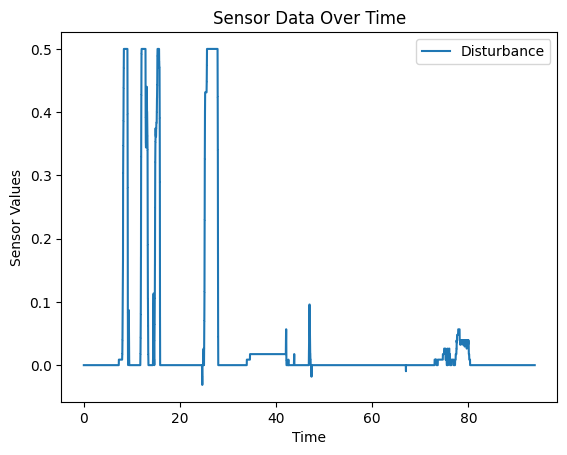

In [14]:
start_time = 18
end_time = 45

data = load_from_mat("data/2/data_lqr_1.1.mat")  # , start_time, end_time)
# data_underdamped = load_from_mat("data/1/data_underdamped.mat", start_time, end_time)
# data_critical = load_from_mat("data/1/data_critical.mat", start_time, end_time)
# data_overdamped = load_from_mat("data/1/data_overdamped.mat", start_time, end_time)

plt.figure()
plt.plot(data["time"], data["Yoystick_x"] / 2, label="Disturbance")

# plt.plot(data_unstable["time"], data_unstable["Pitch"], label="Unstable")
# plt.plot(data_underdamped["time"], data_underdamped["Pitch"], label="Underdamped")
# plt.plot(data_critical["time"], data_critical["Pitch"], label="Critical")
# plt.plot(data_overdamped["time"], data_overdamped["Pitch"], label="Overdamped")

plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.title("Sensor Data Over Time")
plt.legend()
plt.show()